<a href="https://colab.research.google.com/github/AristidisZ/Melbourne_Tutorial_model_validation_first_model_etc/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import seaborn as sns

from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt




In [2]:
data = pd.read_csv('/content/student-por.csv', sep=';')
data.head(10)



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences',]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,0,11,11,2,0,4
1,9,11,11,2,0,2
2,12,13,12,2,0,6
3,14,14,14,3,0,0
4,11,13,13,2,0,0


In [5]:
X = data.drop('G3',axis=1)
y = data['G3']

In [6]:
X.head()

,G1,G2,studytime,failures,absences
0,0,11,2,0,4
1,9,11,2,0,2
2,12,13,2,0,6
3,14,14,3,0,0
4,11,13,2,0,0


In [7]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [8]:
X_train, X_test ,y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [ ]:
best = 0 
for _ in range(30):
  X_train, X_test , y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
  linear = linear_model.LinearRegression()
  linear.fit(X_train, y_train)
  acc = linear.score(X_test, y_test)
  print(acc)

  if acc > best:
    best = acc
    with open("studentmodel.pickle", "wb") as f:
      pickle.dump(linear, f)
      accBest = (acc)   




In [ ]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [ ]:
pred = linear.predict(X_test)
print(pred)


In [ ]:
for x in range(len(pred)):
  print(pred[x])

In [12]:
x1 = data['G1']
y1 = data['G3']



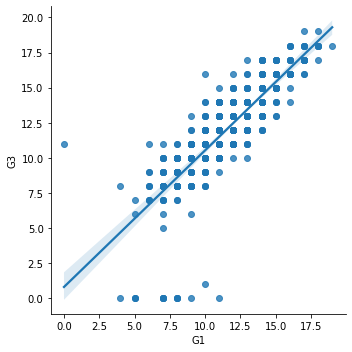

In [14]:
sns.lmplot(x="G1", y="G3", data=data);

In [19]:
print(accBest)


0.9527095751537542


In [30]:
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)
#clf.predict(X_test , y_test)
accB = clf.score(X_test, y_test)
print(accB)

0.9458006172152511


In [ ]:
bestB = 0
for _ in range(30):
  X_train, X_test ,y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
  clf = linear_model.BayesianRidge()
  clf.fit(X_train, y_train)
  #clf.predict(X_test , y_test)
  accB = clf.score(X_test, y_test)
  print(accB)


  if accB > bestB :
    bestB = (accB)
    



In [45]:
bestB

0.969217864619907

In [46]:
predB = clf.predict(X_test)
print(predB)

[13.57399629 10.3540946   7.56323941 10.31321815  8.35732171  5.58220088
 14.38851681 15.67291617 17.49614747 12.48369895 15.376657   14.45998949
 15.62192583  9.3101618   8.23477046 12.26919267  9.58049464 15.44821792
 12.45851274 12.14656334  7.18527148  8.39345017 11.12773867 13.18578211
 11.19921135 10.37457694  8.14273735  8.20950616  7.93843321  9.4681014
 17.31215934 12.861711   14.42939326 12.41222627 16.44660437 13.7680983
 18.33098401 13.44124291 10.85473598 14.25568535 10.6299495  13.20626445
  8.27556882 11.33204282 14.15654673 17.04649641 14.43962935 11.57259762
 14.25568535 12.14656334 12.48369895  8.59238841 11.38319948 11.26057014
 13.47192738  9.35575227  8.66711489 13.7680983  15.27451001 10.10891401
  6.93529878 10.31321815  0.59094086  6.98637736 11.11753654]
